<a href="https://colab.research.google.com/github/Shamnath16/Electricity-Consumption-and-Cost-Analysis-SKE1033-Assignment/blob/main/updated%20assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# =====================================================
# Task 1: Data Cleaning Process
# =====================================================

import pandas as pd
import numpy as np

# 1. Define the path with quotes and no spaces in the variable name
file_path = "/content/drive/MyDrive/Colab Notebooks/dataset_student.csv"

# -----------------------------------------------------
# 2. Load the dataset using the variable
# -----------------------------------------------------
df = pd.read_csv(file_path)


# -----------------------------------------------------
# 2. Inspect missing values
# -----------------------------------------------------
print("Missing values before cleaning:")
print(df.isnull().sum())

# -----------------------------------------------------
# 3. Sort data for proper time-based interpolation
# -----------------------------------------------------
df = df.sort_values(by=["Region", "Year", "Month"])

# -----------------------------------------------------
# 4. Handle missing values using INTERPOLATION
# -----------------------------------------------------
df["Consumption_kWh"] = (
    df.groupby("Region")["Consumption_kWh"]
    .transform(lambda x: x.interpolate(method="linear"))
)

df["Cost_RM"] = (
    df.groupby("Region")["Cost_RM"]
    .transform(lambda x: x.interpolate(method="linear"))
)

# -----------------------------------------------------
# 5. Handle missing Occupants using MEDIAN BY REGION
# -----------------------------------------------------
df["Occupants"] = (
    df.groupby("Region")["Occupants"]
    .transform(lambda x: x.fillna(x.median()))
)

print("\nMissing values after handling:")
print(df.isnull().sum())

# -----------------------------------------------------
# 6. Detect and handle outliers (IQR) — Consumption_kWh
# -----------------------------------------------------
Q1_c = df["Consumption_kWh"].quantile(0.25)
Q3_c = df["Consumption_kWh"].quantile(0.75)
IQR_c = Q3_c - Q1_c

lower_c = Q1_c - 1.5 * IQR_c
upper_c = Q3_c + 1.5 * IQR_c

outliers_c = (
    (df["Consumption_kWh"] < lower_c) |
    (df["Consumption_kWh"] > upper_c)
)

print(f"\nConsumption_kWh outliers detected: {outliers_c.sum()}")

df.loc[outliers_c, "Consumption_kWh"] = df["Consumption_kWh"].median()

# -----------------------------------------------------
# 7. Detect and handle outliers (IQR) — Cost_RM
# -----------------------------------------------------
Q1_cost = df["Cost_RM"].quantile(0.25)
Q3_cost = df["Cost_RM"].quantile(0.75)
IQR_cost = Q3_cost - Q1_cost

lower_cost = Q1_cost - 1.5 * IQR_cost
upper_cost = Q3_cost + 1.5 * IQR_cost

outliers_cost = (
    (df["Cost_RM"] < lower_cost) |
    (df["Cost_RM"] > upper_cost)
)

print(f"Cost_RM outliers detected: {outliers_cost.sum()}")

df.loc[outliers_cost, "Cost_RM"] = df["Cost_RM"].median()

print("\nOutliers in Consumption_kWh and Cost_RM replaced with median values.")

# -----------------------------------------------------
# 8. Preview cleaned dataset
# -----------------------------------------------------
print("\nCleaned dataset preview:")
print(df.head())

# -----------------------------------------------------
# 9. Save cleaned dataset for Task 2–Task 4
# -----------------------------------------------------
df.to_csv("cleaned_dataset_student.csv", index=False)

print("Cleaned dataset saved as 'cleaned_dataset_student.csv'")



Missing values before cleaning:
Year               0
Month              0
Region             0
Consumption_kWh    5
Cost_RM            5
Occupants          5
dtype: int64

Missing values after handling:
Year               0
Month              0
Region             0
Consumption_kWh    0
Cost_RM            0
Occupants          0
dtype: int64

Consumption_kWh outliers detected: 2
Cost_RM outliers detected: 0

Outliers in Consumption_kWh and Cost_RM replaced with median values.

Cleaned dataset preview:
    Year  Month Region  Consumption_kWh  Cost_RM  Occupants
2   2018      1  Rural           283.32   161.49        6.0
5   2018      2  Rural           341.51   194.66        4.0
8   2018      3  Rural           355.59   202.69        7.0
11  2018      4  Rural           337.14   192.17        7.0
14  2018      5  Rural           342.52   195.24        6.0
Cleaned dataset saved as 'cleaned_dataset_student.csv'


In [12]:
# -----------------------------------------------------
# Task 2: Descriptive Data Analysis
# Using cleaned data from Task 1
# -----------------------------------------------------

import pandas as pd

# -----------------------------------------------------
# 1. Load cleaned dataset
# -----------------------------------------------------
# This file was saved at the end of Task 1
df = pd.read_csv("cleaned_dataset_student.csv")

# Verify data
print("First 5 rows of cleaned dataset:")
print(df.head())

# -----------------------------------------------------
# 2. Summary statistics by region
# -----------------------------------------------------
# Compute mean, median, and standard deviation for
# electricity consumption and cost
summary_stats = df.groupby("Region")[["Consumption_kWh", "Cost_RM"]].agg(
    ["mean", "median", "std"]
)

print("\nSummary Statistics by Region:")
print(summary_stats)

# -----------------------------------------------------
# 3. Overall correlation analysis
# -----------------------------------------------------
# Relationship between electricity consumption and occupants
overall_correlation = df[["Consumption_kWh", "Occupants"]].corr()

print("\nOverall Correlation (All Regions):")
print(overall_correlation)

# -----------------------------------------------------
# 4. Correlation analysis by region
# -----------------------------------------------------
# Calculate correlation separately for Urban, Suburban, and Rural
print("\nCorrelation by Region:")

for region in df["Region"].unique():
    region_data = df[df["Region"] == region]

    correlation = region_data[["Consumption_kWh", "Occupants"]].corr()

    print(f"\n{region} Region:")
    print(correlation)

# -----------------------------------------------------
# End of Task 2
# -----------------------------------------------------

First 5 rows of cleaned dataset:
   Year  Month Region  Consumption_kWh  Cost_RM  Occupants
0  2018      1  Rural           283.32   161.49        6.0
1  2018      2  Rural           341.51   194.66        4.0
2  2018      3  Rural           355.59   202.69        7.0
3  2018      4  Rural           337.14   192.17        7.0
4  2018      5  Rural           342.52   195.24        6.0

Summary Statistics by Region:
         Consumption_kWh                         Cost_RM                   
                    mean   median        std        mean  median        std
Region                                                                     
Rural         304.127833  295.985  45.751771  172.345333  168.71  24.602635
Suburban      398.512667  407.510  47.619918  227.035833  232.28  26.980798
Urban         499.011250  498.930  41.626337  285.046667  284.39  22.751027

Overall Correlation (All Regions):
                 Consumption_kWh  Occupants
Consumption_kWh         1.000000  -0.542103
Oc

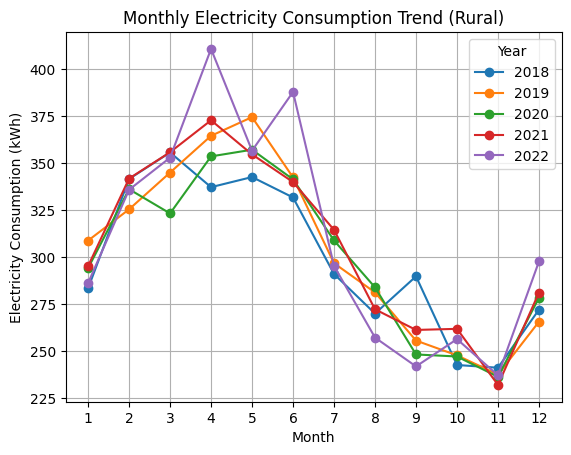

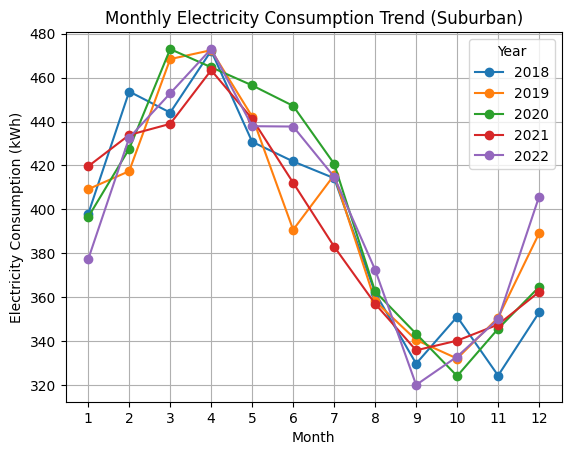

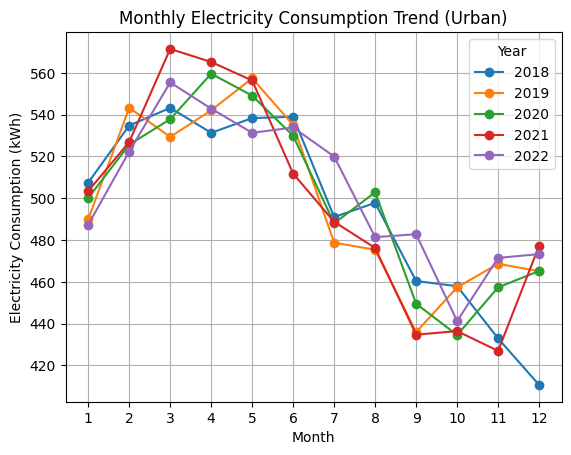

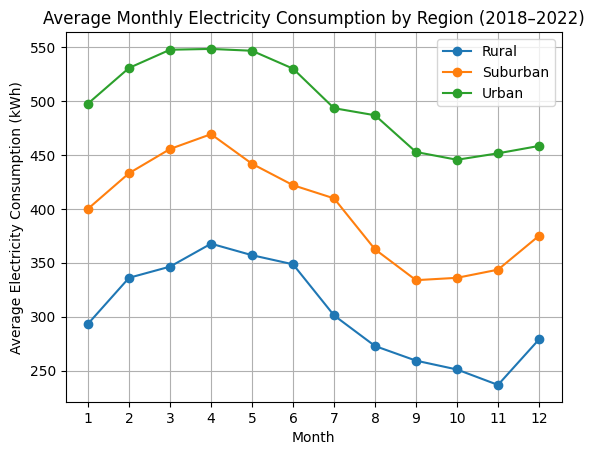

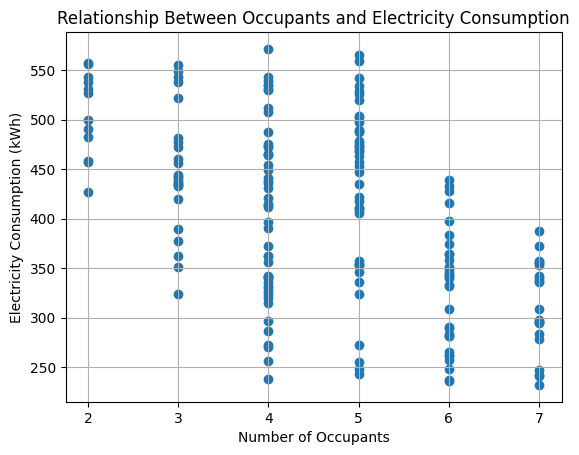

In [13]:
# -----------------------------------------------------
# Task 3: Data Visualisation
# Using cleaned data from Task 1
# -----------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------------------
# 1. Load cleaned dataset
# -----------------------------------------------------
df = pd.read_csv("cleaned_dataset_student.csv")

# -----------------------------------------------------
# 2. Monthly consumption trends for EACH region
# -----------------------------------------------------
# Separate line graph for Urban, Suburban, and Rural
for region in df["Region"].unique():
    region_data = df[df["Region"] == region]

    plt.figure()

    # Plot each year as a separate line
    for year in sorted(region_data["Year"].unique()):
        year_data = region_data[region_data["Year"] == year].sort_values("Month")
        plt.plot(
            year_data["Month"],
            year_data["Consumption_kWh"],
            marker="o",
            label=str(year)
        )

    plt.xticks(range(1, 13))
    plt.xlabel("Month")
    plt.ylabel("Electricity Consumption (kWh)")
    plt.title(f"Monthly Electricity Consumption Trend ({region})")
    plt.legend(title="Year")
    plt.grid()
    plt.show()

# -----------------------------------------------------
# 3. Multi-line plot comparing all regions
# -----------------------------------------------------
plt.figure()

for region in df["Region"].unique():
    region_data = df[df["Region"] == region]

    # Average monthly consumption across years
    monthly_avg = region_data.groupby("Month")["Consumption_kWh"].mean()
    plt.plot(monthly_avg.index, monthly_avg.values, marker="o", label=region)

plt.xticks(range(1, 13))
plt.xlabel("Month")
plt.ylabel("Average Electricity Consumption (kWh)")
plt.title("Average Monthly Electricity Consumption by Region (2018–2022)")
plt.legend()
plt.grid()
plt.show()

# -----------------------------------------------------
# 4. Scatter plot: Occupants vs Electricity Consumption
# -----------------------------------------------------
plt.figure()
plt.scatter(df["Occupants"], df["Consumption_kWh"])
plt.xlabel("Number of Occupants")
plt.ylabel("Electricity Consumption (kWh)")
plt.title("Relationship Between Occupants and Electricity Consumption")
plt.grid()
plt.show()


R-squared: 0.996
Mean Absolute Error (MAE): 0.97

Model Coefficients:
           Feature  Coefficient
0  Consumption_kWh     0.566462
1        Occupants    -0.388118

Intercept: 3.15


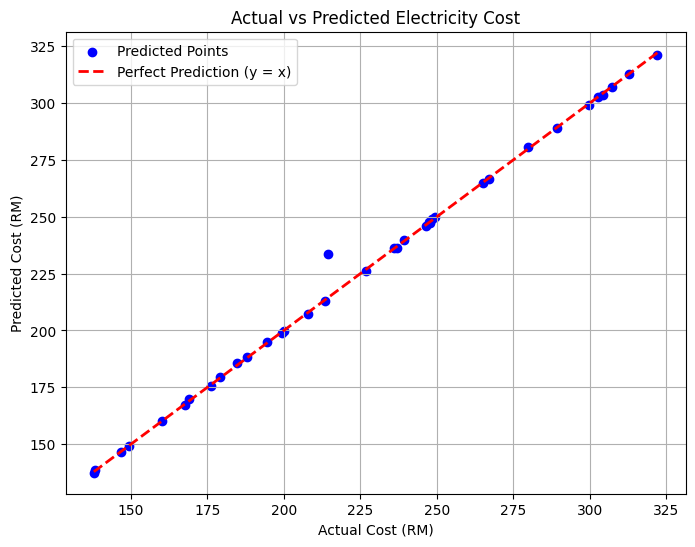

In [14]:
# -----------------------------------------------------
# Task 4: Predictive Analysis
# Linear Regression Model for Electricity Cost Prediction
# -----------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# -----------------------------------------------------
# 1. Load cleaned dataset
# -----------------------------------------------------
df = pd.read_csv("cleaned_dataset_student.csv")

# -----------------------------------------------------
# 2. Define features (X) and target variable (y)
# -----------------------------------------------------
# Features: Electricity consumption and number of occupants
X = df[["Consumption_kWh", "Occupants"]]

# Target: Electricity cost
y = df["Cost_RM"]

# -----------------------------------------------------
# 3. Split dataset into training and testing sets (80:20)
# -----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------------------------------
# 4. Train the Linear Regression model
# -----------------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------------------------------------
# 5. Make predictions on the test set
# -----------------------------------------------------
y_pred = model.predict(X_test)

# -----------------------------------------------------
# 6. Evaluate model performance
# -----------------------------------------------------
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# -----------------------------------------------------
# 7. Display model coefficients
# -----------------------------------------------------
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print("\nModel Coefficients:")
print(coefficients)
print(f"\nIntercept: {model.intercept_:.2f}")

# -----------------------------------------------------
# 8. Plot Actual vs Predicted Electricity Cost
# -----------------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Points')
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red',
    linestyle="--",
    linewidth=2,
    label="Perfect Prediction (y = x)"
)
plt.xlabel("Actual Cost (RM)")
plt.ylabel("Predicted Cost (RM)")
plt.title("Actual vs Predicted Electricity Cost")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------------------------------
# End of Task 4
# -----------------------------------------------------